<a href="https://colab.research.google.com/github/BUGATAASHWINI/ML-Training-/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


In [2]:
path = "/content/Iris.csv"
df = pd.read_csv(path)

In [3]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

In [5]:
print(df.head(15))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [6]:
X = df.drop(columns=['Species'])
y = df['Species']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
k_values = range(1, 16)
accuracies = []

In [10]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=1, Accuracy=0.9667
K=2, Accuracy=0.9333
K=3, Accuracy=0.9333
K=4, Accuracy=0.9333
K=5, Accuracy=0.9333
K=6, Accuracy=0.9333
K=7, Accuracy=0.9667
K=8, Accuracy=0.9333
K=9, Accuracy=0.9667
K=10, Accuracy=0.9667
K=11, Accuracy=0.9667
K=12, Accuracy=0.9667
K=13, Accuracy=0.9667
K=14, Accuracy=0.9333
K=15, Accuracy=0.9333


In [11]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best K value: {best_k}, Accuracy: {max(accuracies):.4f}")

Best K value: 1, Accuracy: 0.9667


In [12]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

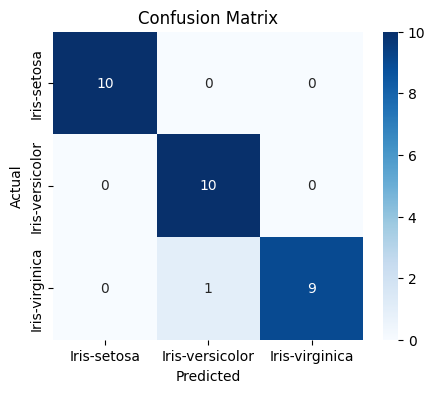

In [13]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_best.classes_,
            yticklabels=knn_best.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=1)

In [32]:
print(Z.shape)
print(Z.dtype)

(378, 319)
object


In [34]:
h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels to numerical values and ensure the array is numerical
label_map = {label: i for i, label in enumerate(np.unique(y))}
Z = np.array([label_map[label] for label in Z.ravel()], dtype=np.int64).reshape(xx.shape)

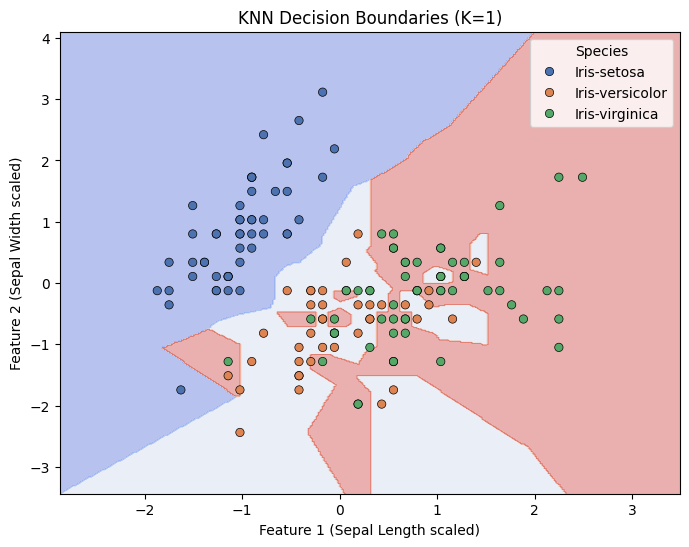

In [36]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y, palette='deep', edgecolor='k')
plt.xlabel("Feature 1 (Sepal Length scaled)")
plt.ylabel("Feature 2 (Sepal Width scaled)")
plt.title(f"KNN Decision Boundaries (K={best_k})")
plt.show()